Домашнее задание к лекции "Визуализация данных"

Содержание задания можно также найти здесь github.com...tion.ipynb

Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
Overall rank Общий рейтинг 
Country or region Страна или регион 
Score Оценка 
GDP per capita ВВП на душу населения 
Social support Социальная поддержка
Healthy life expectancy Ожидаемая продолжительность здоровой жизни
Freedom to make life choices Свобода делать жизненный выбор
Generosity Щедрость
Perceptions of corruption Представления о коррупции


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [41]:
# Выделим топ10 стран с наивысшей оценкой уровня счастья в 2019 году
df[['Country or region', 'Overall rank']].sort_values(by=['Overall rank'],ascending=True).head(10)


,Country or region,Overall rank
0,Finland,1
1,Denmark,2
2,Norway,3
3,Iceland,4
4,Netherlands,5
5,Switzerland,6
6,Sweden,7
7,New Zealand,8
8,Canada,9
9,Austria,10


<AxesSubplot:title={'center':'Happiness rank by country (top10)'}, xlabel='Country or region'>

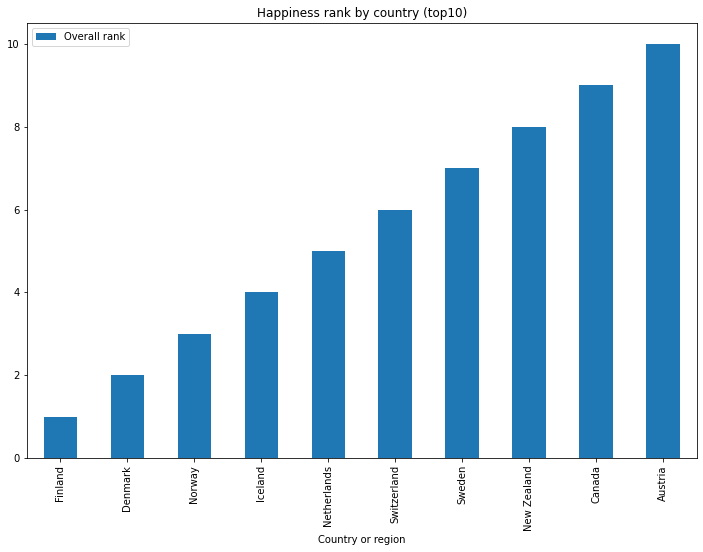

In [45]:
# Отобразим топ10 стран с наивысшей оценкой уровня счастья на гистограмме
df[['Country or region', 'Overall rank']].head(10).plot(
    kind='bar', 
    title='Happiness rank by country (top10)',
    x='Country or region',
    y='Overall rank',
    figsize=(12,8)
)

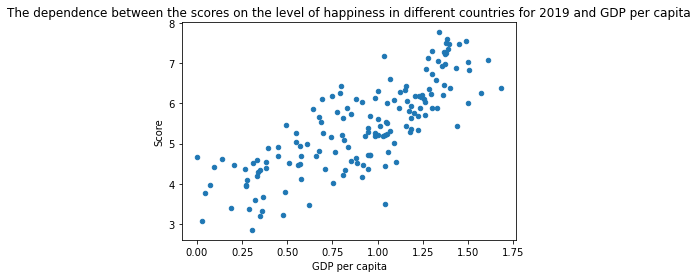

In [61]:
# Определим взаимосвязь между  оценкой уровня счастья в разных странах и ВВП на душу населения в 2019 году на диаграмме рассеяния
df.plot(kind='scatter', 
        x='GDP per capita', 
        y='Score', 
        title='The dependence between the scores on the level of happiness in different countries for 2019 and GDP per capita')
plt.show()


In [ ]:
# Из диаграммы рассеяния видна взаимосвзяь между оценкой уровня счастья в разных странах и ВВП на душу населения в 2019 году. Чем выше уровень ВВП, тем выше уровень счастья

Ящик с усами, диаграмма размаха
Box plot

<AxesSubplot:title={'center':'Score of happiness in different countries in 2019'}>

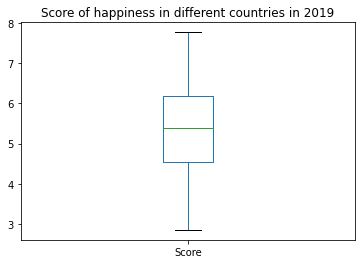

In [63]:
# Изучим диаграмму размаха баллов по уровню счастья в разных странах за 2019 год
df.Score.plot(kind='box',
              title='Score of happiness in different countries in 2019')

In [ ]:
# Значение параметра Score of happiness на диаграмме выше варьируется от 3 до 8, медийное значение 5.5. Слишком низкие или слишком высокие значения отсутствуют, как и выбросы


<AxesSubplot:>

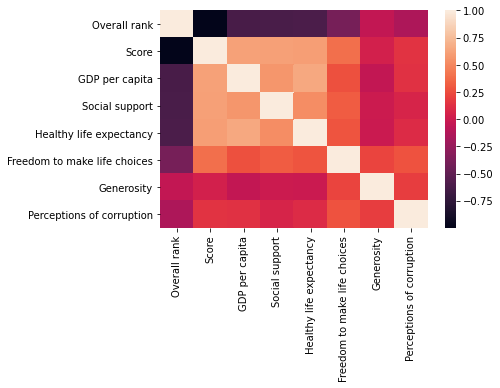

In [65]:
# Построим тепловую карту Heat Map
sns.heatmap(df.corr(method='kendall'))


In [ ]:
# Значения Score и GDP per capita, Social support , Healthy life expectancy тесно взаимосвязаны. Чем выше данные показатели, тем выше баллы по уровню счастья. Взаимосвязь прямая.

In [ ]:
# Отобразим топ 5 стран с наибольшим уровнем социальной поддержки на круговой диаграмме ниже.

In [24]:
df[['Country or region', 'Social support']].sort_values(by=['Social support'],ascending=False).head(5)


,Country or region,Social support
3,Iceland,1.624
0,Finland,1.587
2,Norway,1.582
1,Denmark,1.573
7,New Zealand,1.557


<AxesSubplot:title={'center':'Top 5 countries with the highest social support'}, ylabel='Social support'>

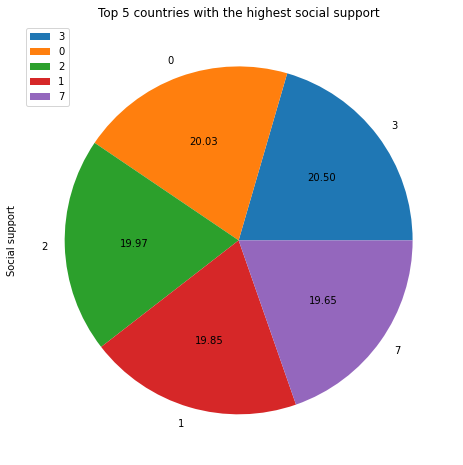

In [26]:
df[['Social support','Country or region']].sort_values(by=['Social support'],ascending=False).head(5).plot(
    kind='pie' ,
    figsize=(12,8),
    y = 'Social support',
    xlabel = 'Country or region',
    autopct='%1.2f',
    title  = 'Top 5 countries with the highest social support'
)   

In [ ]:
# Все 5 стран в рейтинге c самым выскоим уровнем социальной поддержки входят в топ 10 стран по уровню счастья и в топ 10 стран по уровню ВВП.  

<AxesSubplot:title={'center':'Score of Freedom to make life choices'}, ylabel='Frequency'>

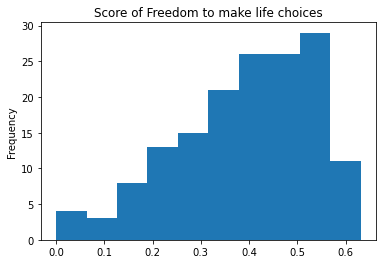

In [62]:
# Рассмотрим ниже распределение оценок уровня  Свободы делать жизненный выбор и уровня Представления о коррупции в странах рейтинга.
df['Freedom to make life choices'].plot(kind='hist', 
                   bins=10,
                   title='Score of Freedom to make life choices'
                   )

In [ ]:
# На графике видим длинный левый хвост (пик частоты оценок 0.4-0.55), что говорит о том, что население чаще довольно уровнем Свободы делать жизненный выбор.

<AxesSubplot:title={'center':'Score of Perceptions of corruption'}, ylabel='Frequency'>

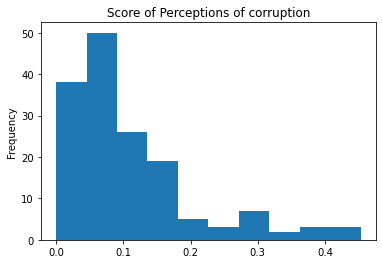

In [37]:
df['Perceptions of corruption'].plot(kind='hist', 
                   bins=10,
                   title='Score of Perceptions of corruption'
                   )


In [ ]:
# На данном же графике видим обратную ситуацию. Пик оценок приходится на оценке 0-0.1, что говорит о том, что в большинстве стран люди не довольны уровнем коррупции.